<a href="https://colab.research.google.com/github/malcolmtgy/Group33-Abalone-Dataset/blob/main/Group33_AbaloneAgePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries & Load Data

Reference


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from scipy import stats

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to your file
file_path = "/content/drive/MyDrive/abalone.csv"  # Adjust if needed

# Load the dataset
df = pd.read_csv(file_path)

# Display basic info
print(df.info())  # Check data types and missing values
print(df.head(10))  # Display the first 10 rows

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None
  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565

## Basic Statistics & Summary

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found.")

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Count occurrences of each category in the 'Sex' column
print("\nCategory Counts in 'Sex' Column:")
print(df['Sex'].value_counts())

Missing Values:
 No missing values found.

Summary Statistics:
            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.0

* No missing values in the dataset.
* The numerical features have a reasonable spread, but Height has a minimum value of 0, which might need further investigation.
* The target variable "Rings" (which represents age) ranges from 1 to 29 years, with a mean of ~9.93 years.
* The Sex column has roughly equal counts for Males (M), Females (F), and Infants (I).

## Data Distribution & Outliers

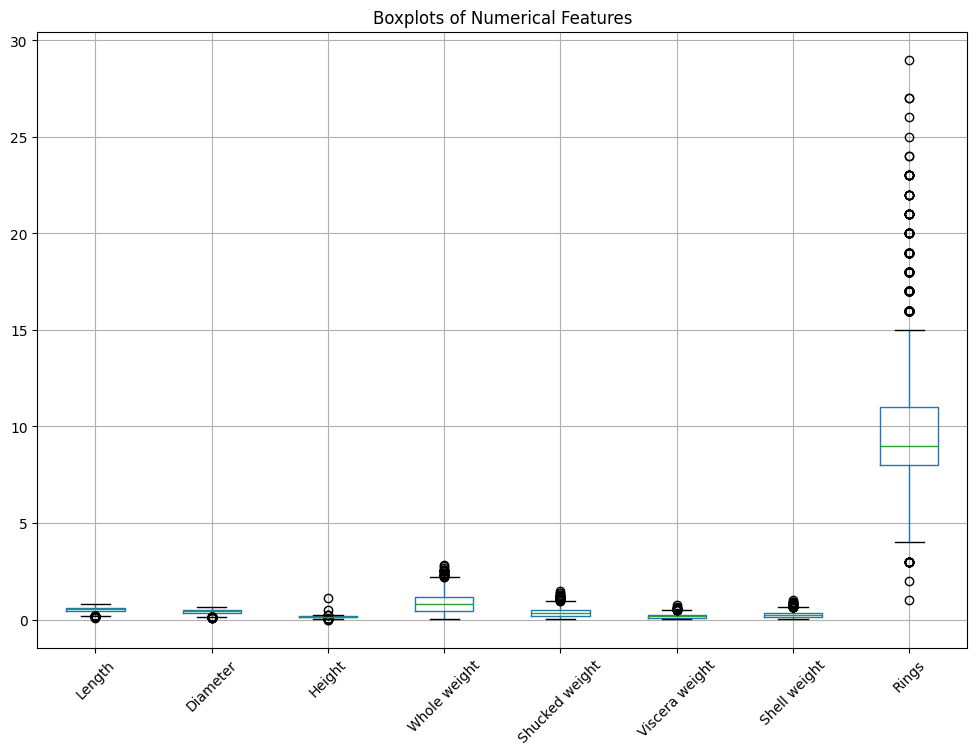

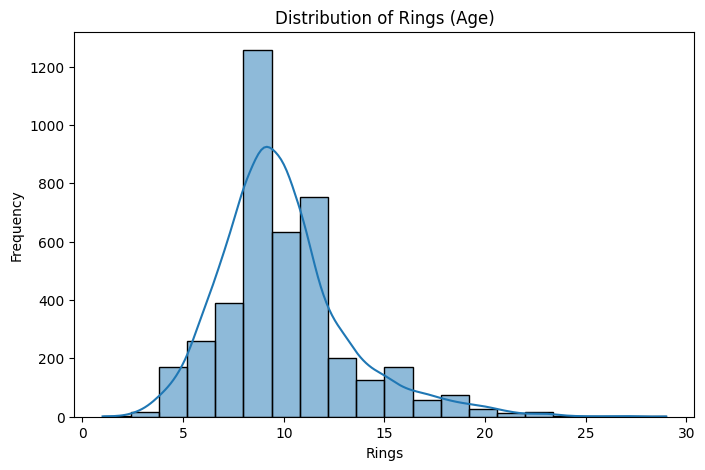

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 8))

# Box plots to check for outliers
df.boxplot(column=['Length', 'Diameter', 'Height', 'Whole weight',
                   'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()

# Histogram of 'Rings' (our target variable)
plt.figure(figsize=(8, 5))
sns.histplot(df['Rings'], bins=20, kde=True)
plt.title("Distribution of Rings (Age)")
plt.xlabel("Rings")
plt.ylabel("Frequency")
plt.show()


## Description for Boxplot of Numerical Features and Distribution of Rings

🔍 Boxplot of Numerical Features:

Length, Diameter, and Height: These features are compact and have a similar distribution. The few outliers are likely not a concern.
Weight Features: Show a wide range with a higher number of outliers. The variability in weights could indicate a few exceptional, heavy abalones.
Rings: Displays a distinct distribution, with many high values and outliers. This suggests that age (or related characteristic) is not uniform across the dataset, and some abalones are significantly older.

📊 Distribution of Rings:

The distribution is positively skewed with a peak between 5-15 rings, indicating that the majority of abalones are relatively young (under 15 years).
The tail extending towards 30 rings suggests that some abalones are significantly older, contributing to the outliers.

## Pairplot of Sampled Data

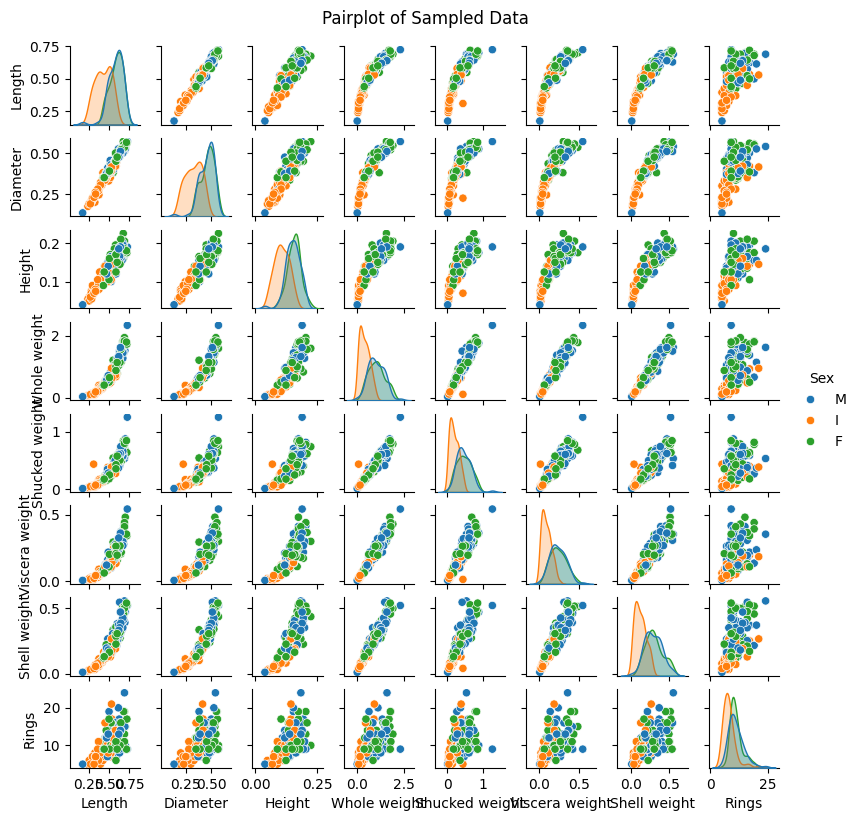

In [ ]:
# Pairplot for Numerical Features
df_sample = df.sample(200, random_state=99)
sns.pairplot(df_sample, hue='Sex', diag_kind='kde', height = 1)
plt.suptitle("Pairplot of Sampled Data", y=1.02)
plt.show()

## ***Description for pairplot***



Write description for above pairplot here

1.  Strong Positive Correlations:

Length vs Diameter: As length increases, diameter also increases.

Whole weight vs Shucked weight: Heavier abalones tend to have more meat.

2.  Weak or No Correlations:

Sex vs Rings: There’s no clear relationship between sex and the number of rings.

3.  Outliers:

Look for points that are far away from the main cluster in the scatterplots. These could be outliers or errors in the data.

4. Clusters:

If you see distinct clusters in the scatterplots, it might indicate subgroups in the data (Sex).




## Boxplot of Rings by Sex

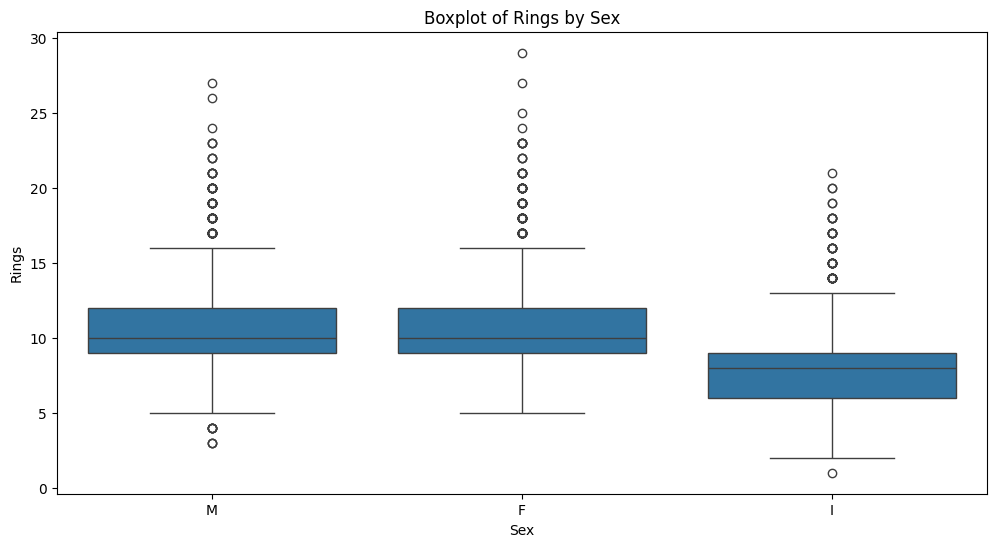

In [ ]:
# Boxplots for Categorical vs Numerical Features
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sex', y='Rings', data=df)
plt.title("Boxplot of Rings by Sex")
plt.show()

Write description for Boxplot of Rings here

## Correlation Heatmap of Numerical Features

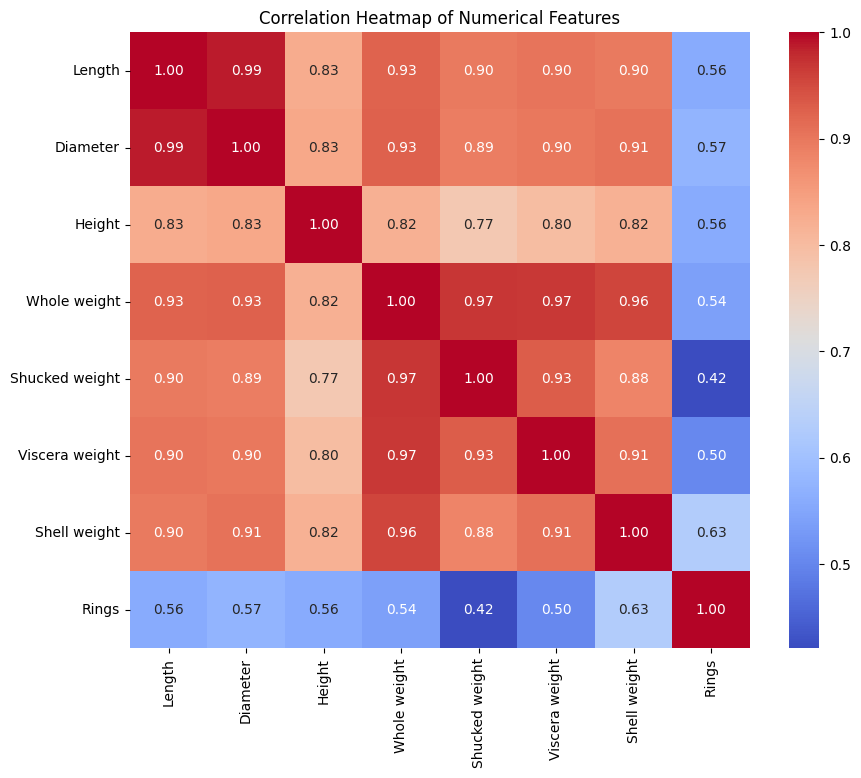

In [ ]:
# Correlation Heatmap for Numerical Features
plt.figure(figsize=(10, 8))
corr = df.corr(method = 'pearson', numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Outlier Handling, Log Transformation, and Feature Scaling, Data Splitting: Training and Testing Sets

In [ ]:
# Function to cap outliers
def cap_outliers(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Defining the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Capping values
        df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Apply outlier capping
df = cap_outliers(df)

# Log Transformation for skewed features
log_transform_columns = ['Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df[log_transform_columns] = df[log_transform_columns].apply(lambda x: np.log1p(x))

# Encode 'Sex' column using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Separate features (X) and target (y)
X = df_encoded.drop('Rings', axis=1)  # Drop the target column 'Rings'
y = df_encoded['Rings']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')
X_train = selector.fit_transform(X_train_scaled, y_train)
X_test = selector.transform(X_test_scaled)

# Visualize feature importance
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print("\nFeature Importance Scores:\n", feature_scores)

# Check the size of the training and testing sets
print(f"Training set size: {len(X_train)} rows")
print(f"Testing set size: {len(X_test)} rows")



Feature Importance Scores:
           Feature        Score
6    Shell weight  3341.322922
2          Height  3067.899979
1        Diameter  2837.790217
3    Whole weight  2796.224165
0          Length  2621.692828
5  Viscera weight  2082.438257
4  Shucked weight  1600.016950
7           Sex_I  1099.691603
8           Sex_M   159.546812
Training set size: 3341 rows
Testing set size: 836 rows


In this step, we handled several important preprocessing tasks to improve the quality of the data for the modeling process:

Outlier Handling: We capped the outliers in the features related to weight and rings using the 1st and 99th percentiles. This is important because extreme outliers can skew the results of our models and make them less generalizable. By capping the values, we ensure that the model isn't overly influenced by those extreme values, which could represent rare, possibly erroneous cases.

Log Transformation: We applied a log transformation to the "Whole weight" and "Shucked weight" features. These features had a positive skew, meaning that the data was not evenly distributed. A log transformation helps to reduce this skew by compressing the higher values, making the distribution closer to normal. This can improve the performance of many machine learning algorithms, which tend to work better when the data is normally distributed.

Feature Scaling: Lastly, we scaled the numerical features using StandardScaler. Scaling is essential because many machine learning algorithms, especially those that rely on distance metrics (like k-nearest neighbors or logistic regression), are sensitive to the scale of the features. By scaling the features to have a mean of 0 and a standard deviation of 1, we ensure that each feature contributes equally to the model, preventing any one feature from dominating due to its scale.

These preprocessing steps ensure that the data is in better shape for training the machine learning models, helping the algorithms learn patterns more effectively and potentially improving model performance.

## Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f'Linear Regression Mean Squared Error: {mse}')
print(f'Linear Regression R-squared: {r2}')


Linear Regression Mean Squared Error: 0.026609120265811564
Linear Regression R-squared: 0.634287717544459


Mean Squared Error (MSE): 0.0266. This measures the average squared difference between the actual and predicted values. Lower MSE is better, but we need to compare this to other models to evaluate its performance.

R-squared (R²): 0.63. This indicates that approximately 63% of the variance in the target variable (Rings) is explained by the model. While not perfect, it's a solid starting point, especially for a linear model.

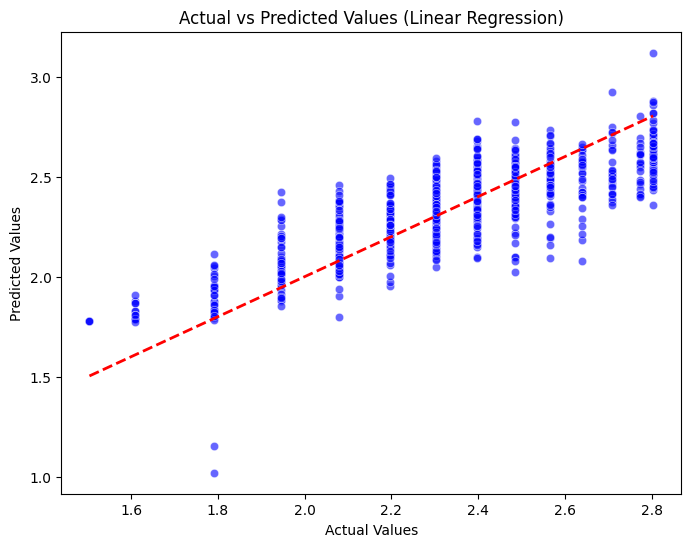

In [ ]:


# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.show()


## Random Forest Model

In [ ]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate the Mean Squared Error and R-squared for the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display the results
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")


Random Forest Mean Squared Error: 0.02449718698519991
Random Forest R-squared: 0.663313853423091


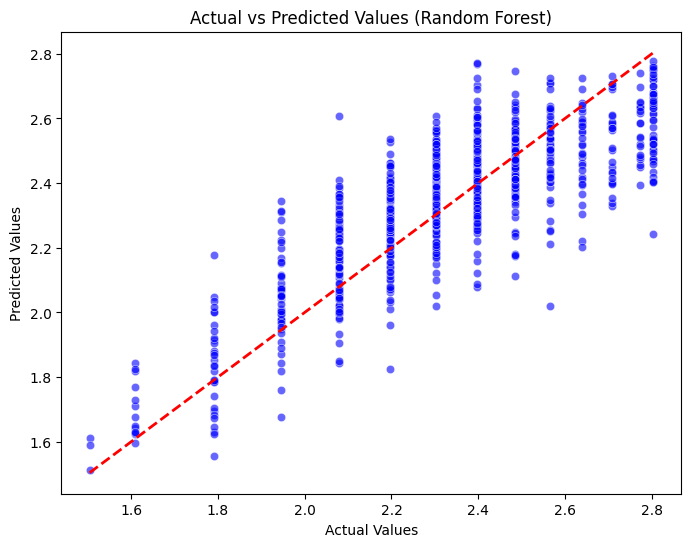

In [ ]:
# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Random Forest)")
plt.show()

Mean Squared Error: The MSE for the Random Forest model is 0.3493, which indicates that, on average, the model's predictions are off by a value of approximately 0.35 in terms of the squared difference from the actual values. Lower MSE is preferable, and this value suggests a relatively good fit compared to the linear regression model.

R-squared: The R-squared value of 0.6638 means that the Random Forest model explains about 66.4% of the variance in the "Rings" feature. This is a considerable improvement over the linear regression model, which had an R-squared of 0.634. It suggests that the Random Forest model is better at capturing the underlying patterns in the data.

The Random Forest model has shown a slight improvement in both MSE and R-squared over linear regression, meaning it performs better in this case.

## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)  #Train model
y_pred_dt = dt_model.predict(X_test) #predict test set

#methods for model evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regression MSE: {mse_dt:.4f}")
print(f"Decision Tree Regression R²: {r2_dt:.4f}")

Decision Tree Regression MSE: 0.0483
Decision Tree Regression R²: 0.3355


In [ ]:
print(f"Range of y: {y.min()} to {y.max()}")
print(f"Mean of y: {y.mean()}")
print(f"Variance of y: {y.var()}")

Range of y: 1.5040773967762742 to 2.803360380906535
Mean of y: 2.3424395396261457
Variance of y: 0.07005551413547727


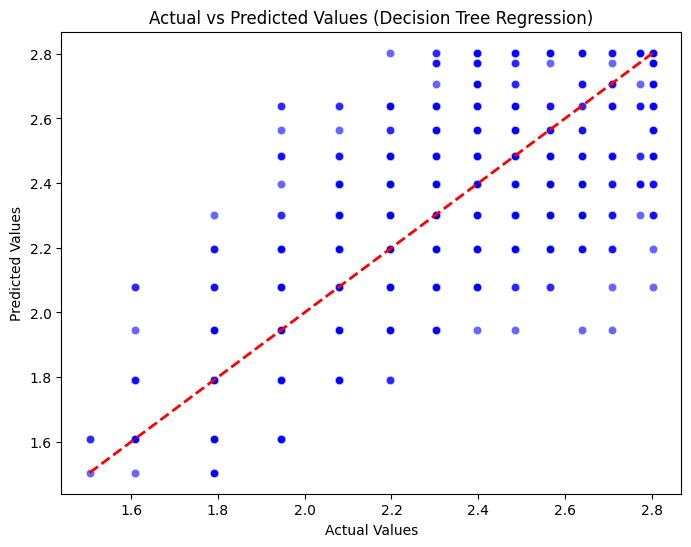

In [ ]:
# Scatter plot: Actual vs Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_dt, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Decision Tree Regression)")
plt.show()

::As seen with the MSE of 0.0483 over the target predicted range, it is relatively high, further more the R² is 0.3355, it shows that the model is not capturing much of the variance in the data, and the rest is left unexplained.

To combat this, we will explore different parameter combinations to get the best perforemance. Hence we've decided to use GridSearchCV to improve performance

In [ ]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best R² Score: {grid_search.best_score_:.4f}")

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best R² Score: 0.5998


In [ ]:
# Use the best model for predictions
best_dt_model = grid_search.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)

# Evaluate the best model
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
r2_best_dt = r2_score(y_test, y_pred_best_dt)

print(f"Tuned Decision Tree MSE: {mse_best_dt:.4f}")
print(f"Tuned Decision Tree R²: {r2_best_dt:.4f}")

Tuned Decision Tree MSE: 0.0273
Tuned Decision Tree R²: 0.6245




When tuned, the MSE and R² shows more improvements.

MSE decreased from 0.0483 to 0.0273, showing that predictive accuracy has increased significantly.

R² score improved from 0.3355 to 0.6245. While this is a substantial improvement, it still leaves about 48% of the variance unexplained.

##Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train SVR Model
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

# Predictions
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Model Evaluation
train_r2 = svr.score(X_train, y_train)
test_r2 = svr.score(X_test, y_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print Evaluation Metrics
print(f"🔹 **Training Set Performance**")
print(f"R² Score: {train_r2:.4f}")
print(f"MSE: {train_mse:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAE: {train_mae:.4f}")

print("\n🔹 **Testing Set Performance**")
print(f"R² Score: {test_r2:.4f}")
print(f"MSE: {test_mse:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")


🔹 **Training Set Performance**
R² Score: 0.6245
MSE: 0.0260
RMSE: 0.1614
MAE: 0.1265

🔹 **Testing Set Performance**
R² Score: 0.6395
MSE: 0.0262
RMSE: 0.1620
MAE: 0.1273


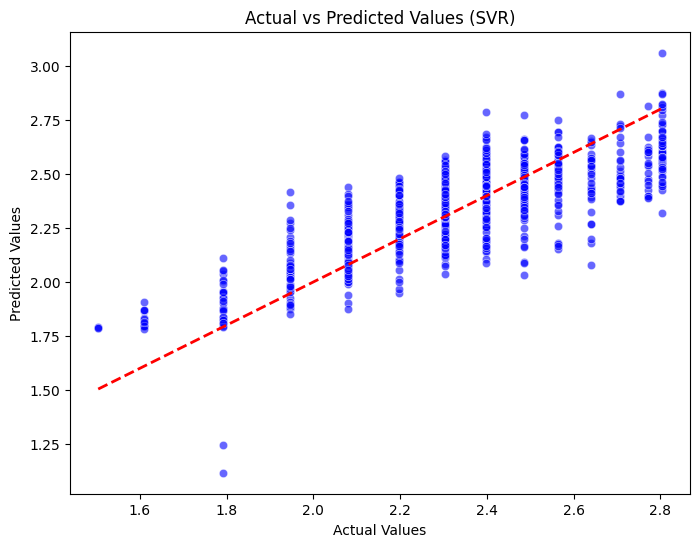

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (SVR)")
plt.show()


**Tune Hyperparameter**


SVR Test MSE: 0.02303532228612406
SVR Test R2: 0.6834055314041596


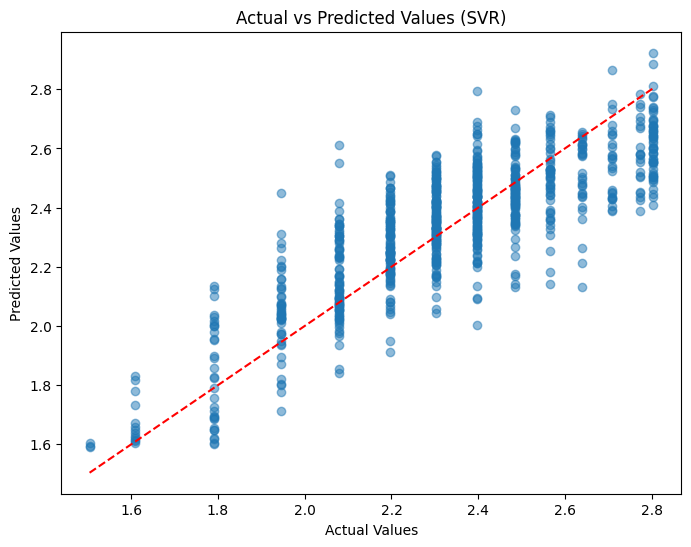

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVR model with tuned hyperparameters
svr = SVR(C=10, epsilon=0.1, kernel='rbf')  # Example hyperparameters
svr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_test = svr.predict(X_test_scaled)

# Evaluate the model
print("SVR Test MSE:", mean_squared_error(y_test, y_pred_test))
print("SVR Test R2:", r2_score(y_test, y_pred_test))

# Plot Actual vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (SVR)")
plt.show()

## Gradient Boosting Models (e.g., XGBoost or LightGBM)

Mean Squared Error (XGBoost): 0.026838590631228995
R-squared (XGBoost): 0.631133906736195


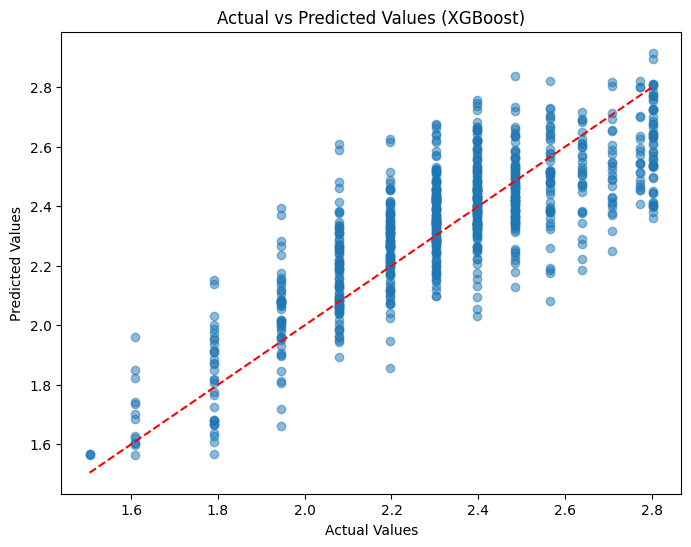

In [ ]:
# Import necessary libraries
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBoost Regressor model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Display the results
print(f'Mean Squared Error (XGBoost): {mse_xgb}')
print(f'R-squared (XGBoost): {r2_xgb}')

# Plot Actual vs Predicted Values for XGBoost
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (XGBoost)")
plt.show()

##Compare Model Results

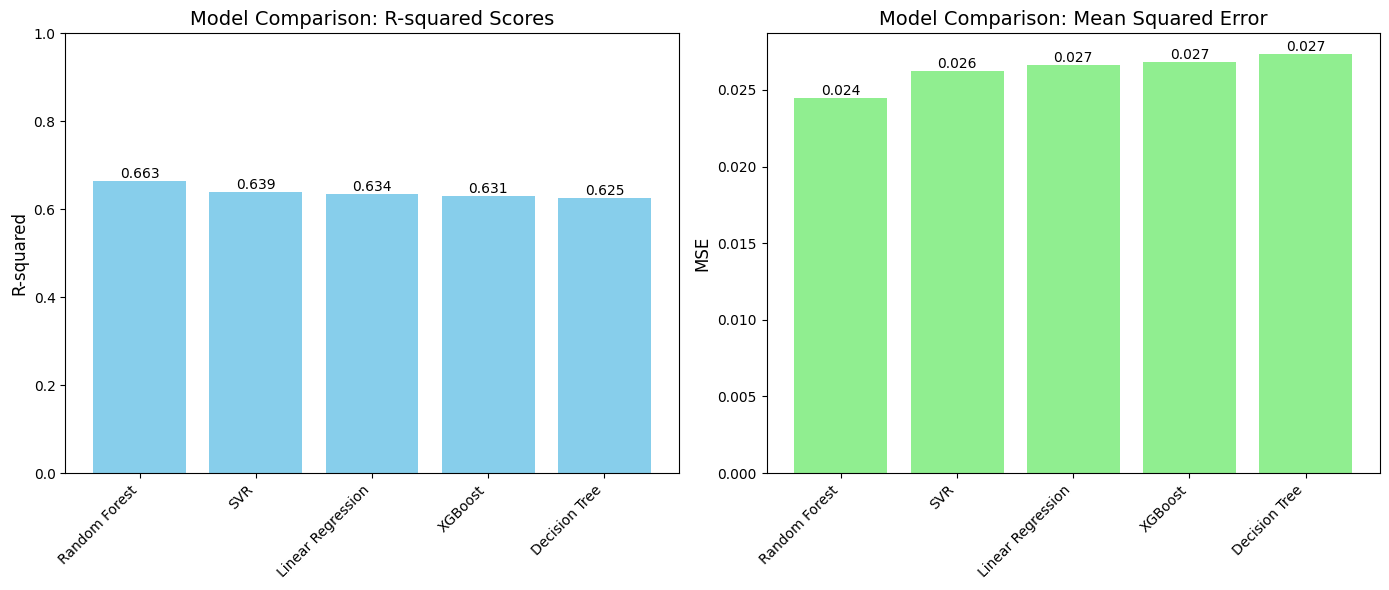

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Collect all model results in a dictionary
model_results = {
    'Linear Regression': {
        'MSE': mse,
        'R2': r2
    },
    'Random Forest': {
        'MSE': mse_rf,
        'R2': r2_rf
    },
    'Decision Tree': {
        'MSE': mse_best_dt,
        'R2': r2_best_dt
    },
    'SVR': {
        'MSE': test_mse,  # Using test set metrics
        'R2': test_r2
    },
    'XGBoost': {
        'MSE': mse_xgb,
        'R2': r2_xgb
    }
}

# Convert to DataFrame and sort by R2 score
results_df = pd.DataFrame(model_results).T.sort_values('R2', ascending=False)

# Create comparison plot
plt.figure(figsize=(14, 6))

# R-squared comparison
plt.subplot(1, 2, 1)
bars_r2 = plt.bar(results_df.index, results_df['R2'], color='skyblue')
plt.title('Model Comparison: R-squared Scores', fontsize=14)
plt.ylabel('R-squared', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

# Add values on top of bars
for bar in bars_r2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

# MSE comparison
plt.subplot(1, 2, 2)
bars_mse = plt.bar(results_df.index, results_df['MSE'], color='lightgreen')
plt.title('Model Comparison: Mean Squared Error', fontsize=14)
plt.ylabel('MSE', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add values on top of bars
for bar in bars_mse:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

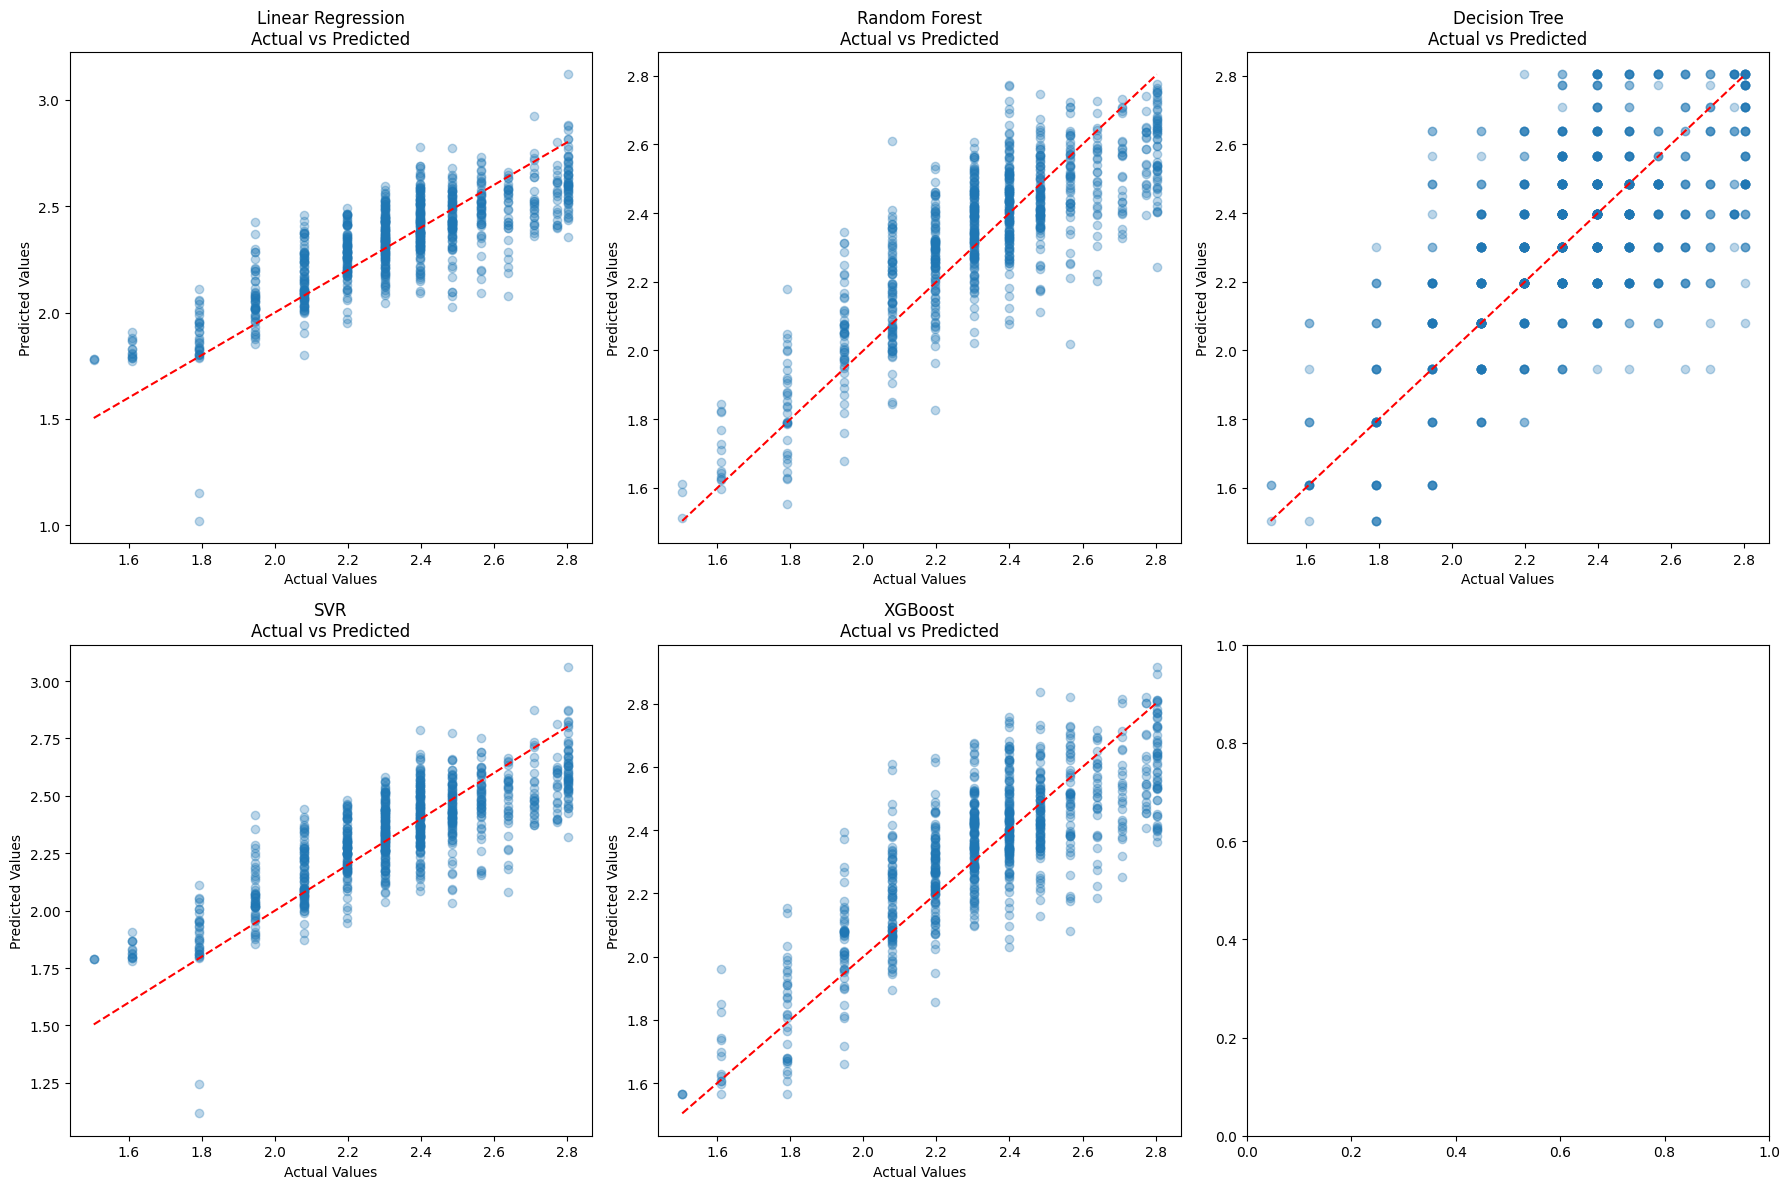

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
models = {
    'Linear Regression': y_pred,
    'Random Forest': y_pred_rf,
    'Decision Tree': y_pred_dt,  # Add your DT predictions
    'SVR': y_test_pred,
    'XGBoost': y_pred_xgb
}

for ax, (name, preds) in zip(axes.flatten(), models.items()):
    ax.scatter(y_test, preds, alpha=0.3)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    ax.set_title(f'{name}\nActual vs Predicted')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()

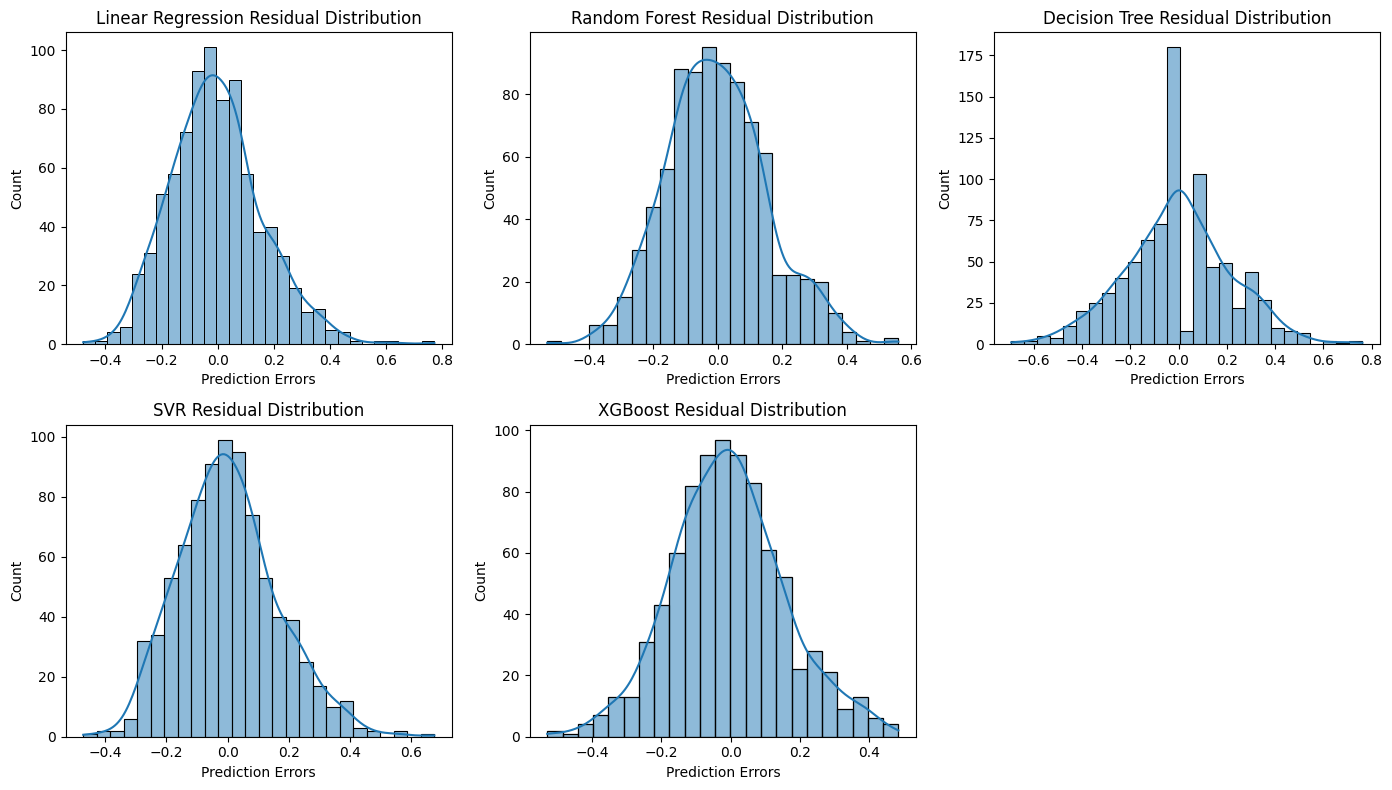

In [ ]:
plt.figure(figsize=(14, 8))

for i, (name, preds) in enumerate(models.items(), 1):
    residuals = y_test - preds
    plt.subplot(2, 3, i)
    sns.histplot(residuals, kde=True)
    plt.title(f'{name} Residual Distribution')
    plt.xlabel('Prediction Errors')

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

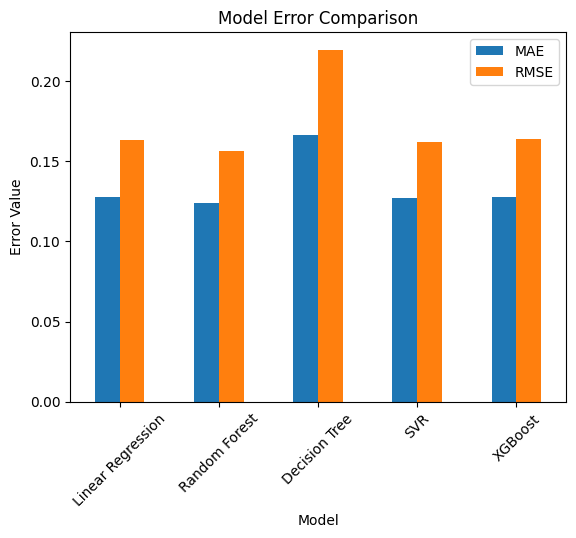

In [ ]:
error_data = []
for name, preds in models.items():
    error_data.append({
        'Model': name,
        'MAE': mean_absolute_error(y_test, preds),
        'RMSE': np.sqrt(mean_squared_error(y_test, preds))
    })

error_df = pd.DataFrame(error_data).set_index('Model')

plt.figure(figsize=(12, 6))
error_df.plot(kind='bar', rot=45)
plt.title('Model Error Comparison')
plt.ylabel('Error Value')
plt.show()